## **LGMVIP Task 4**

### *Level : Intermediate Level Task*

### *Task : Prediction using Decision Tree Algorithm*

### *Author : Rupsha Chatterjee*

### *Dataset : https://bit.ly/3kXTdox*

### **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### **Loading dataset**

In [ ]:
iris = pd.read_csv("Iris.csv")

In [ ]:
#print the first five rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Understanding the data**

In [ ]:
#print the number of rows and columns
iris.shape

(150, 6)

In [ ]:
#check what are the columns present
iris.columns 

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#check the datatypes of each columns
iris.dtypes 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
#print the summary of dataframe
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#show the general statistics of the dataset
iris.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#check for the presence of null values
iris.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As we can see there are no null values.

In [ ]:
#count the number of species of each kind
iris["Species"].value_counts() 

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### **Dividing dataset for train test split**

In [ ]:
x = iris.drop(["Id", "Species"], axis = 1)
y = iris["Species"]
print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

x.shape =  (150, 4)
y.shape =  (150,)


As we can see x contains 150 rows and 4 columns and y contains 150 rows and 1 column.

### **Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,  random_state = 1)

In [ ]:
print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)

X_train =  (105, 4)
X_test =  (45, 4)
y_train =  (105,)
y_test =  (45,)


After splitting, X_train has 105 rows and 4 columns, X_test has 45 rows and 4 columns, y_train has 105 rows and 1 column and y_test has 45 rows and 1 column.

### **Model training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Model testing**

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, pred))

Accuracy =  0.9555555555555556


We can see the accuracy of this model is 96%.

### **Decision Tree**

In [ ]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz

In [ ]:
text_rep=tree.export_text(model)
print(text_rep)

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



<Figure size 1080x1080 with 0 Axes>

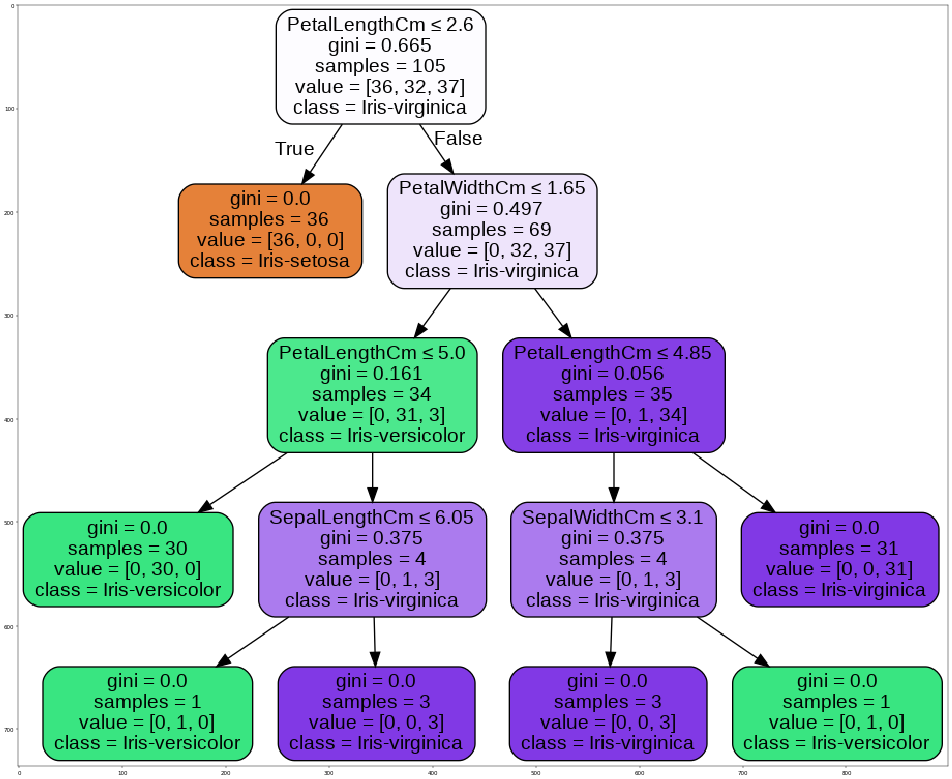

In [ ]:
dot_data=StringIO()
filename="iris_classification.png"
features=iris.columns.tolist()[1:-1]
target=iris["Species"].unique()
fig=plt.figure(figsize=(15,15))
dt=tree.export_graphviz(model, feature_names=features, out_file=dot_data, 
                          class_names=target, filled=True,rotate=False,rounded = True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(30, 30),dpi=40)
plt.imshow(img,interpolation='nearest')